# 第3章 K邻近法

对于新的实例，根据其 k 个最近邻的训练实例的类别的，通过多数表决等方式进行预测

K邻近法的三个基本要素：

* k 值的选择
* 距离量度
* 分类决策规则

## 算法

输入：训练数据集 $T = \{(x_{1}, y_{1}),(x_{2}, y_{2}),\ldots,(x_{N}, y_{N})\}$

输出：实例 x 所属的类 y

（1）根据给定的*距离度量*，在训练集 T 中找出与 x 最邻近的 k 个点，记作 $N_{k}(x)$

（2）在 $N_{k}(x)$ 中根据*分类决策规则*（如多数表决）决定 x 的类别 y

K邻近法没有学习过程

## 距离度量

一般使用的距离是欧氏距离，也可以是更一般的 $L_{p}$ 距离或 Minkowski 距离

$$
L_{p}(x_{i},x_{j}) = (\sum_{l=1}^{n}|x_{i}^{(l)}-x_{j}^{(l)}|^{p})^{1/p}
$$

当 $p = 2$ 时，称为欧式距离

当 $p = 1$ 时，称为曼哈顿距离

当 $p = \infty$ 时，是各个坐标距离的最大值

## k 值的选择

k 值的减小意味着整体模型变得复杂，容易发生过拟合

## 分类决策规则

往往是多数表决

## 准备阶段

加载库，导入数据

In [33]:
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = load_iris()

In [3]:
iris_df = pd.DataFrame(data.data, columns=data.feature_names)
iris_df['label'] = data.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## 原始数据探查

In [4]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

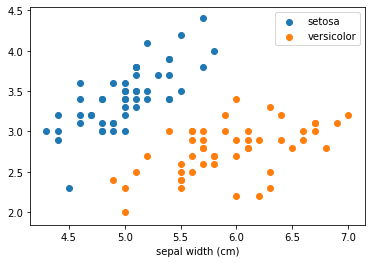

In [5]:
sepal_features = ['sepal length (cm)','sepal width (cm)']
setosa = iris_df[iris_df.label == 0][sepal_features]
versicolor = iris_df[iris_df.label == 1][sepal_features]

plt.scatter(setosa.values[:,0], setosa.values[:,1], label='setosa')
plt.scatter(versicolor.values[:,0], versicolor.values[:,1], label='versicolor')
plt.xlabel(sepal_features[0])
plt.xlabel(sepal_features[1])
plt.legend()

## 准备算法模型

In [58]:
class Model():
    def __init__(self, k=3):
        self.k = k
    
    def fit(self, X_train, y_train):
        self.X = X_train
        self.y = y_train

    def predict(self, X_pred):
        lambda_min_dist = lambda x: np.argsort(np.linalg.norm(X_train - x, ord=2, axis=1))
        min_dist_idx = np.apply_along_axis(lambda_min_dist, axis=1, arr=X_pred)
        idx_mode = stats.mode(y_train[min_dist_idx[:,:self.k]], axis=1)[0]
        return idx_mode.flatten()


## 准备训练数据

In [54]:
sepal_features = ['sepal length (cm)','sepal width (cm)']
X_train = iris_df[iris_df.label.isin([0,1])][sepal_features].values
y_train = iris_df[iris_df.label.isin([0,1])]['label'].values

In [77]:
X_pred = np.random.rand(20, 2) * [2.5, 1.5] + [4.5, 2.5]
X_pred.shape

(20, 2)

## 训练及预测

In [78]:
model = Model()
model.fit(X_train, y_train)
y_pred = model.predict(X_pred)
print(y_pred)

[1 1 0 1 1 1 0 1 1 1 1 1 0 0 0 0 1 1 0 0]


## 画图检验

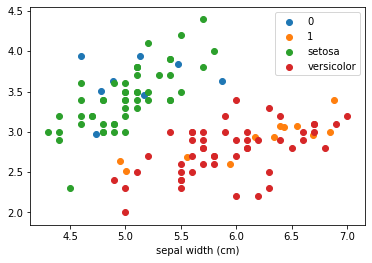

In [79]:
sepal_features = ['sepal length (cm)','sepal width (cm)']
setosa = iris_df[iris_df.label == 0][sepal_features]
versicolor = iris_df[iris_df.label == 1][sepal_features]

plt.scatter(X_pred[y_pred==0][:,0], X_pred[y_pred==0][:,1], label='0')
plt.scatter(X_pred[y_pred==1][:,0], X_pred[y_pred==1][:,1], label='1')

plt.scatter(setosa.values[:,0], setosa.values[:,1], label='setosa')
plt.scatter(versicolor.values[:,0], versicolor.values[:,1], label='versicolor')
plt.xlabel(sepal_features[0])
plt.xlabel(sepal_features[1])
plt.legend()